In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_complete=pd.merge(mouse_data,clinical_data,on='Mouse ID')

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data=data_complete.groupby(['Drug','Timepoint'])
avg_vol=tumor_data['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
avg_vol_df=pd.DataFrame(avg_vol)
avg_vol_df=avg_vol_df.reset_index()

# Preview DataFrame
avg_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_vol=tumor_data['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
std_error_df=pd.DataFrame(std_error_vol)
std_error_df=std_error_df.reset_index()

# Preview DataFrame
std_error_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [20]:
# Minor Data Munging to Re-Format the Data Frames
pivot_df=avg_vol_df.pivot_table('Tumor Volume (mm3)','Timepoint','Drug')
pivot_error_df=std_error_df.pivot_table('Tumor Volume (mm3)','Timepoint','Drug')

# Preview that Reformatting worked
pivot_error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


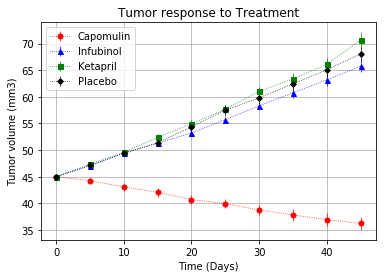

In [30]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots()

# Generate data for obs and errors
x_axis = pivot_df.index.values
capo_data = pivot_df['Capomulin']
capo_error = pivot_error_df['Capomulin']
infu_data = pivot_df['Infubinol']
infu_error = pivot_error_df['Infubinol']
keta_data = pivot_df['Ketapril']
keta_error = pivot_error_df['Ketapril']
plac_data = pivot_df['Placebo']
plac_error = pivot_error_df['Placebo']

# Plot with error bars
ax.errorbar(x_axis,capo_data, marker='o', linewidth=0.7, color='r', linestyle=':', markersize=5,
           yerr=capo_error)
ax.errorbar(x_axis, infu_data, marker='^', linewidth=0.7, color='b',linestyle=':', markersize=5,
           yerr=infu_error)
ax.errorbar(x_axis,keta_data, marker='s', linewidth=0.7, color='g',linestyle=':', markersize=5,
           yerr=keta_error)
ax.errorbar(x_axis,plac_data, marker='D', linewidth=0.7, color='k',linestyle=':', markersize=4,
           yerr=plac_error)
ax.grid()
ax.legend(loc='best')
ax.set_title('Tumor response to Treatment')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor volume (mm3)')

# Save the Figure
plt.savefig('Images/tumor_response.png')

## Metastatic Response to Treatment

In [26]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_data=data_complete.groupby(['Drug','Timepoint'])
avg_met=met_data['Metastatic Sites'].mean()

# Convert to DataFrame
avg_met_df=pd.DataFrame(avg_met)

# Preview DataFrame
avg_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [27]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_met=met_data['Metastatic Sites'].sem()

# Convert to DataFrame
std_error_met_df=pd.DataFrame(std_error_met)

# Preview DataFrame
std_error_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [28]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_df=avg_met_df.pivot_table('Metastatic Sites','Timepoint','Drug')
pivot_error_met_df=std_error_met_df.pivot_table('Metastatic Sites','Timepoint','Drug')

# Preview that Reformatting worked
pivot_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


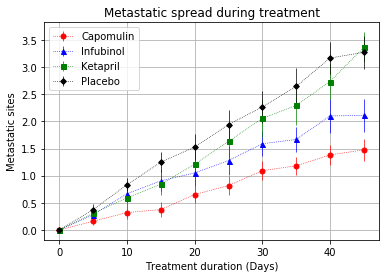

In [31]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots()

# Generate data for obs and errors
capo_data_met=pivot_met_df['Capomulin']
capo_error_met=pivot_error_met_df['Capomulin']
infu_data_met=pivot_met_df['Infubinol']
infu_error_met=pivot_error_met_df['Infubinol']
keta_data_met=pivot_met_df['Ketapril']
keta_error_met=pivot_error_met_df['Ketapril']
plac_data_met=pivot_met_df['Placebo']
plac_error_met=pivot_error_met_df['Placebo']

# Plot with error bars
ax.errorbar(x_axis,capo_data_met, marker='o', linewidth=0.7, color='r', linestyle=':', markersize=5,
           yerr=capo_error_met)
ax.errorbar(x_axis, infu_data_met, marker='^', linewidth=0.7, color='b',linestyle=':', markersize=5,
           yerr=infu_error_met)
ax.errorbar(x_axis,keta_data_met, marker='s', linewidth=0.7, color='g',linestyle=':', markersize=5,
           yerr=keta_error_met)
ax.errorbar(x_axis,plac_data_met, marker='D', linewidth=0.7, color='k',linestyle=':', markersize=4,
           yerr=plac_error_met)
ax.grid()
ax.legend(loc='best')
ax.set_title('Metastatic spread during treatment')
ax.set_xlabel('Treatment duration (Days)')
ax.set_ylabel('Metastatic sites')

# Save the Figure
plt.savefig('Images/met_sites.png')

## Survival Rates

In [32]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_group=data_complete.groupby(['Drug','Timepoint'])
count_mice=count_mice_group['Mouse ID'].count()

# Convert to DataFrame
count_mice_df=pd.DataFrame(count_mice)
count_mice_df=count_mice_df.rename(columns={'Mouse ID':'Mouse count'})
count_mice_df=count_mice_df.reset_index()

# Preview DataFrame
count_mice_df.head()

,Drug,Timepoint,Mouse count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [33]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice_df=count_mice_df.pivot_table('Mouse count','Timepoint','Drug')

# Preview that Reformatting worked
pivot_mice_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


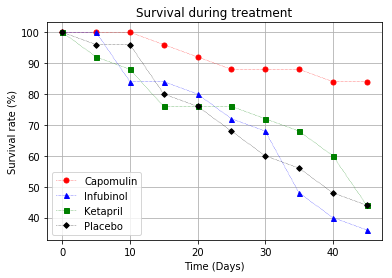

In [34]:
# Generate the Plot (Accounting for percentages)

# All drugs started with same amount of mice
mouse_init=pivot_mice_df.iloc[0,0]

# Generate data for obs and errors
capomulin_mice=(pivot_mice_df[['Capomulin']]/mouse_init)*100
infubinol_mice=(pivot_mice_df[['Infubinol']]/mouse_init)*100
ketapril_mice=(pivot_mice_df[['Ketapril']]/mouse_init)*100
placebo_mice=(pivot_mice_df[['Placebo']]/mouse_init)*100

# Plot with error bars
plt.plot(capomulin_mice.index.values,capomulin_mice['Capomulin'],marker='o',color='r',linestyle=':',
         linewidth=0.5,markersize=5)
plt.plot(infubinol_mice.index.values,infubinol_mice['Infubinol'],marker='^',color='b',linestyle=':',
         linewidth=0.5,markersize=5)
plt.plot(ketapril_mice.index.values,ketapril_mice['Ketapril'],marker='s',color='g',linestyle=':',
         linewidth=0.5,markersize=5)
plt.plot(placebo_mice.index.values,placebo_mice['Placebo'],marker='D',color='k',linestyle=':',
         linewidth=0.5,markersize=4)
plt.legend(loc='best')
plt.grid()
plt.title('Survival during treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival rate (%)')

# Save the Figure
plt.savefig('Images/mice_count.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [35]:
# Calculate the percent changes for each drug
perc_change=(pivot_df.iloc[9,:] - pivot_df.iloc[0,:])/pivot_df.iloc[0,:]*100

# Display the data to confirm
perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

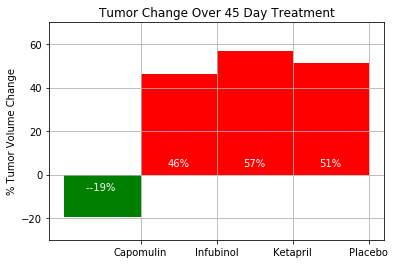